In [1]:
import pandas as pd
data = pd.read_table('clinton_trump_tweets.txt', encoding = 'ISO-8859-1', header=None)
data.columns = ["Name", "ScreenName", "UserID", "FollowersCount", "FriendsCount", "Location", "Description", "CreatedAt", "StatusID", "Language", "Place", "RetweetCount", "FavoriteCount", "Text"]


In [2]:
cleaned_data = data[~data.Text.str.startswith('RT')]

In [3]:
len(cleaned_data.UserID.unique())

164797

In [4]:
df = cleaned_data.iloc[:,[2,13]]

In [5]:
print(len(df))

2416530


In [6]:
print(len(cleaned_data))

2416530


In [7]:
groupeddf = df.groupby('UserID').agg(sum).reset_index()

In [8]:
def split_tweets(tweet):
    listOfSplitedTweets = []
    listOfSplitedTweets=[t for t in tweet.split() if t.startswith('#') or t.startswith('@')]
    return listOfSplitedTweets


In [9]:
groupeddf['HashtagHandles'] = groupeddf.Text.apply(split_tweets)

In [10]:
groupeddf.shape

(164797, 3)

In [11]:
groupeddf_1 = groupeddf[groupeddf.HashtagHandles.str.len()!=0]

In [12]:
def distinct_tweets(hashtaghandles):
    return list(set(hashtaghandles))

In [13]:
groupeddf_1['DistinctHashtagHandles'] = groupeddf_1.HashtagHandles.apply(distinct_tweets)

C:\Users\jinali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
groupeddf_2 = groupeddf_1[groupeddf_1.DistinctHashtagHandles.str.len()>=20]

In [15]:
groupeddf_2.shape

(13811, 4)

In [16]:
AllHashtagHandles = []
for list1 in groupeddf_2.DistinctHashtagHandles:
    for i in list1:
        AllHashtagHandles.append(i)

In [17]:
print(len(AllHashtagHandles))

738474


In [18]:
import numpy as np
CountHashtagHandles = {}
arrayAllHashtagHandles = np.array(AllHashtagHandles)
CountHashtagHandles = np.unique(arrayAllHashtagHandles, return_counts=True)

In [19]:
CountHashtagHandles[1]

array([611,   2,   1, ...,   1,   1,   1], dtype=int64)

In [20]:
popularHashtagHandles = []
for i in range(0,len(CountHashtagHandles[1])):
        if (CountHashtagHandles[1][i] >= 20):
            popularHashtagHandles.append(CountHashtagHandles[0][i])

In [21]:
len(CountHashtagHandles[1])

436038

In [22]:
len(popularHashtagHandles)

2338

In [23]:
def get_popular_hashtaghandles(DistinctHashtagHandles):
    ListFinalHashtagHandles = []
    for i in DistinctHashtagHandles:
        if (i in popularHashtagHandles):
            ListFinalHashtagHandles.append(i)
    return ListFinalHashtagHandles

In [24]:
groupeddf_2['PopularHashtagHandles'] = groupeddf_2.DistinctHashtagHandles.apply(get_popular_hashtaghandles)

C:\Users\jinali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
groupeddf_2.shape

(13811, 5)

In [26]:
groupeddf_3 = groupeddf_2[groupeddf_2.PopularHashtagHandles.str.len()>=20]

In [27]:
groupeddf_3.shape

(2278, 5)

In [28]:
ListofHashtagHandles = []
for i in groupeddf_3.PopularHashtagHandles:
    str1 = ' '.join(i)
    ListofHashtagHandles.append(str1)
    

In [29]:
import sklearn.feature_extraction.text as sk_text

vectorizer_1 = sk_text.CountVectorizer(min_df=1)
#vectorizer = sk_text.CountVectorizer(min_df=1, stop_words = 'english')

#min_df: ignore terms that have a document frequency < min_df.

matrix = vectorizer_1.fit_transform(ListofHashtagHandles)

print(type(matrix))          # Compressed Sparse Row matrix
#temp = matrix.toarray()
print(matrix.toarray())        #  convert it to numpy array

print(vectorizer_1.get_feature_names())

<class 'scipy.sparse.csr.csr_matrix'>
[[1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
['0hour1__', '10', '100percfedup', '12', '1a', '2016', '20committee', '2a', '2alaw', '_makada_', 'abc', 'abcnetwork', 'abcnews', 'abcpolitics', 'abortion', 'ac360', 'aca', 'aclu', 'acosta', 'actualflatticus', 'ad', 'adamparkhomenko', 'adamsflafan', 'adele', 'adoptdontshop', 'aduanebrown', 'advertising', 'afghanistan', 'aflcio', 'afneil', 'africa', 'agentsofshield', 'ahsfx', 'ahsroanoke', 'ai', 'airbnb', 'ajdelgado13', 'ajenews', 'ajenglish', 'alasscan_', 'alecbaldwin', 'aleppo', 'algiordano', 'aliciakeys', 'alivitali', 'allahpundit', 'allanbrauer', 'allenwest', 'allinwithchris', 'alllibertynews', 'alllivesmatter', 'alternet', 'altright', 'always_trump', 'amandacarpenter', 'amas', 'amazon', 'amazongiveaway', 'america', 'americafirst', 'american', 'americanair', 'americanmex067', 'americans', 'amjoy', 'amjoyshow', 'amlookout

In [30]:
matrix.shape

(2278, 1914)

In [31]:
len(ListofHashtagHandles[0])

476

Text(0,0.5,'SSE')

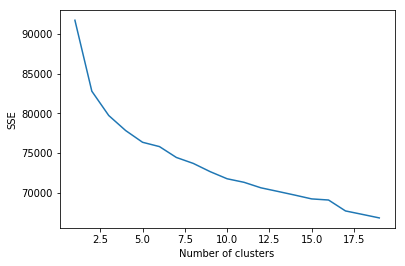

In [32]:
import sklearn.cluster as sk_cluster
import matplotlib.pyplot as plt

%matplotlib inline

error = np.zeros(20)
for k in range(1,20):
    kmeans_1 = sk_cluster.KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans_1.fit_predict(matrix.T)
    error[k] = kmeans_1.inertia_

plt.plot(range(1, 20),error[1:])
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [33]:
kmeans_1 = sk_cluster.KMeans(init='k-means++', n_clusters=5, n_init=10, max_iter=300)  

# n_init: Number of time the k-means algorithm will be run 
# max_iter : int, default: 300

kmeans_1.fit_predict(matrix.T)

print ('\n Cluster Centroids')
centroids = kmeans_1.cluster_centers_
print (centroids)

print ('\nCluster labels')
kmeans_labels_1 = kmeans_1.labels_
print(kmeans_labels_1)


print('\n')
error = kmeans_1.inertia_       #SSE; Sum of squared distances of samples to their closest cluster center.
print ("The total error of the clustering is: ", error)



 Cluster Centroids
[[ 0.14851485  0.13861386  0.03960396 ...,  0.04950495  0.18811881
   0.11881188]
 [ 0.5         1.          0.5        ...,  0.5         4.5         2.        ]
 [ 0.01221544  0.01610217  0.01110494 ...,  0.00888395  0.0294281
   0.00777346]
 [ 0.          0.5         0.         ...,  0.          1.5         0.5       ]
 [ 0.25        0.375       0.125      ...,  0.25        1.125       0.125     ]]

Cluster labels
[2 2 2 ..., 2 2 2]


The total error of the clustering is:  76242.06859225626


In [34]:
import collections
print(collections.Counter(kmeans_labels_1))

Counter({2: 1801, 0: 101, 4: 8, 3: 2, 1: 2})


In [35]:
kmeans_labels_1.shape

(1914,)

In [36]:
cluster_0 = []
cluster_1 = []
cluster_2 = []

elements = vectorizer_1.get_feature_names()
#print(elements)
for i in range(0,1914):
    #print(kmeans_labels_1[i])
    if(kmeans_labels_1[i]==0):
        cluster_0.append(elements[i])
    if(kmeans_labels_1[i]==1):  
        cluster_1.append(elements[i])
    if(kmeans_labels_1[i]==2):  
        cluster_2.append(elements[i])
        
print("Cluster 0")       
print(cluster_0)

print("Cluster 1")
print(cluster_1)

print("Cluster 2")
print(cluster_2)

 

Cluster 0
['abc', 'ap', 'barackobama', 'berniesanders', 'billclinton', 'breitbartnews', 'bretbaier', 'brithume', 'cbsnews', 'cernovich', 'clinton', 'cnnpolitics', 'comey', 'crookedhillary', 'cubs', 'dailycaller', 'danscavino', 'dcexaminer', 'donaldjtrumpjr', 'donnabrazile', 'draintheswamp', 'drudge_report', 'election2016', 'erictrump', 'evan_mcmullin', 'fahrenthold', 'flotus', 'gohillary', 'gop', 'hillaryemails', 'hillarysemail', 'hillarysemails', 'huffpostpol', 'humaabedin', 'imwithher', 'ingrahamangle', 'jaketapper', 'jamesokeefeiii', 'jaredwyand', 'jasoninthehouse', 'johnpodesta', 'joyannreid', 'judgejeanine', 'kellyannepolls', 'kurteichenwald', 'lindasuhler', 'lockherup', 'lorettalynch', 'loudobbs', 'maddow', 'maga', 'maga3x', 'makeamericagreatagain', 'marcorubio', 'mediaite', 'michaelcohen212', 'mike_pence', 'mitchellvii', 'mmflint', 'msm', 'nbc', 'nbcnews', 'neverhillary', 'nevertrump', 'nypost', 'nytimes', 'obama', 'obamacare', 'oreillyfactor', 'podestaemails', 'politico', 'poli

In [37]:
aglo_1 = sk_cluster.AgglomerativeClustering(linkage = 'ward', n_clusters = 5)   

#complete: The maximum distances
#n_clusters: The number of clusters to find.

aglo_labels_1 = aglo_1.fit_predict(matrix.T.toarray())
aglo_labels_1

array([0, 2, 2, ..., 2, 2, 2], dtype=int64)

In [38]:
print(collections.Counter(aglo_labels_1))

Counter({2: 1807, 0: 97, 3: 7, 1: 2, 4: 1})


In [39]:
aglo_labels_1.shape

(1914,)

In [40]:
cluster_ag_0 = []
cluster_ag_2 = []
cluster_ag_3 = []

elements_1 = vectorizer_1.get_feature_names()
for i in range(0,1914):
    if(aglo_labels_1[i] == 0):
        cluster_ag_0.append(elements_1[i])
    if(aglo_labels_1[i] == 2):
        cluster_ag_2.append(elements_1[i])
    if(aglo_labels_1[i] == 3):
        cluster_ag_3.append(elements_1[i])
    
print("Cluster 0")       
print(cluster_ag_0)

print("Cluster 2")
print(cluster_ag_2)

print("Cluster 3")
print(cluster_ag_3)


Cluster 0
['0hour1__', 'abc', 'anncoulter', 'barackobama', 'berniesanders', 'bfraser747', 'billclinton', 'breitbartnews', 'bretbaier', 'brithume', 'carminezozzora', 'cbs', 'cbsnews', 'cernovich', 'cnnpolitics', 'crookedhillary', 'dailycaller', 'danscavino', 'dcexaminer', 'diamondandsilk', 'donaldjtrumpjr', 'donnabrazile', 'draintheswamp', 'drudge_report', 'erictrump', 'evan_mcmullin', 'flotus', 'foxandfriends', 'foxbusiness', 'frankluntz', 'gatewaypundit', 'gop', 'hillary', 'huffpostpol', 'humaabedin', 'imwithher', 'infowars', 'ingrahamangle', 'jackposobiec', 'jaketapper', 'jamesokeefeiii', 'jaredwyand', 'jasoninthehouse', 'johnpodesta', 'joyannreid', 'judgejeanine', 'kellyannepolls', 'kurteichenwald', 'leahr77', 'lindasuhler', 'lorettalynch', 'loudobbs', 'lrihendry', 'maddow', 'maga', 'maga3x', 'magnifier661', 'michaelcohen212', 'mike_pence', 'mitchellvii', 'mmflint', 'msnbc', 'nbc', 'nbcnews', 'neverhillary', 'nevertrump', 'nypost', 'nytimes', 'obamamalik', 'oreillyfactor', 'paulkrug

In [41]:
vectorizer_2 = sk_text.CountVectorizer(min_df=1)
#vectorizer = sk_text.CountVectorizer(min_df=1, stop_words = 'english')

#min_df: ignore terms that have a document frequency < min_df.

matrix_2 = vectorizer_2.fit_transform(ListofHashtagHandles)

print(type(matrix_2))          # Compressed Sparse Row matrix
#temp = matrix.toarray()
print(matrix_2.toarray())        #  convert it to numpy array

print(vectorizer_2.get_feature_names())

<class 'scipy.sparse.csr.csr_matrix'>
[[1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
['0hour1__', '10', '100percfedup', '12', '1a', '2016', '20committee', '2a', '2alaw', '_makada_', 'abc', 'abcnetwork', 'abcnews', 'abcpolitics', 'abortion', 'ac360', 'aca', 'aclu', 'acosta', 'actualflatticus', 'ad', 'adamparkhomenko', 'adamsflafan', 'adele', 'adoptdontshop', 'aduanebrown', 'advertising', 'afghanistan', 'aflcio', 'afneil', 'africa', 'agentsofshield', 'ahsfx', 'ahsroanoke', 'ai', 'airbnb', 'ajdelgado13', 'ajenews', 'ajenglish', 'alasscan_', 'alecbaldwin', 'aleppo', 'algiordano', 'aliciakeys', 'alivitali', 'allahpundit', 'allanbrauer', 'allenwest', 'allinwithchris', 'alllibertynews', 'alllivesmatter', 'alternet', 'altright', 'always_trump', 'amandacarpenter', 'amas', 'amazon', 'amazongiveaway', 'america', 'americafirst', 'american', 'americanair', 'americanmex067', 'americans', 'amjoy', 'amjoyshow', 'amlookout

Text(0,0.5,'SSE')

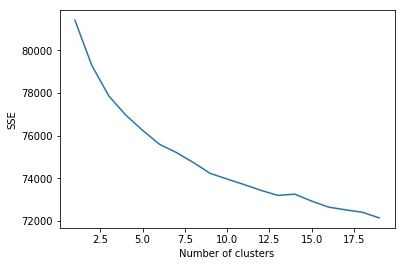

In [42]:
import sklearn.cluster as sk_cluster
import matplotlib.pyplot as plt

%matplotlib inline

error = np.zeros(20)
for k in range(1,20):
    kmeans_2 = sk_cluster.KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans_2.fit_predict(matrix_2)
    error[k] = kmeans_2.inertia_

plt.plot(range(1, 20),error[1:])
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [43]:
kmeans_2 = sk_cluster.KMeans(init='k-means++', n_clusters=2, n_init=10, max_iter=300)  

# n_init: Number of time the k-means algorithm will be run 
# max_iter : int, default: 300

kmeans_2.fit_predict(matrix_2)
print ('\n Cluster Centroids')
centroids = kmeans_2.cluster_centers_
print (centroids)

print ('\nCluster labels')
kmeans_labels_2 = kmeans_2.labels_
print(kmeans_labels_2)


print('\n')
error = kmeans_2.inertia_       #SSE; Sum of squared distances of samples to their closest cluster center.
print ("The total error of the clustering is: ", error)



 Cluster Centroids
[[ 0.04149856  0.00288184  0.01095101 ...,  0.02881844  0.00345821
   0.01210375]
 [ 0.05893186  0.00184162  0.00368324 ...,  0.02578269  0.00552486
   0.00552486]]

Cluster labels
[0 0 0 ..., 0 1 0]


The total error of the clustering is:  79286.96672027015


In [44]:
matrix_2.shape

(2278, 1914)

In [45]:
print(collections.Counter(kmeans_labels_2))

Counter({0: 1735, 1: 543})


In [46]:
print(kmeans_labels_2)

[0 0 0 ..., 0 1 0]


In [47]:
kmeans_labels_2.shape

(2278,)

In [48]:
print(kmeans_2.cluster_centers_)
asc_order_centroids = kmeans_2.cluster_centers_.argsort()    # argsort() returns the indices that would sort an array.

des_order_centroids = asc_order_centroids[:,::-1]     #  get the indices in descending order
print(des_order_centroids)

[[ 0.04149856  0.00288184  0.01095101 ...,  0.02881844  0.00345821
   0.01210375]
 [ 0.05893186  0.00184162  0.00368324 ...,  0.02578269  0.00552486
   0.00552486]]
[[1389  714  330 ...,  121  495 1598]
 [ 714 1719 1389 ..., 1533  262  352]]


In [49]:
terms = vectorizer_2.get_feature_names()
print(terms, '\n')
for i in range(2):
    print ("Cluster:", i)
    for ind in des_order_centroids[i, :30]:
        print (terms[ind])
    print()   

['0hour1__', '10', '100percfedup', '12', '1a', '2016', '20committee', '2a', '2alaw', '_makada_', 'abc', 'abcnetwork', 'abcnews', 'abcpolitics', 'abortion', 'ac360', 'aca', 'aclu', 'acosta', 'actualflatticus', 'ad', 'adamparkhomenko', 'adamsflafan', 'adele', 'adoptdontshop', 'aduanebrown', 'advertising', 'afghanistan', 'aflcio', 'afneil', 'africa', 'agentsofshield', 'ahsfx', 'ahsroanoke', 'ai', 'airbnb', 'ajdelgado13', 'ajenews', 'ajenglish', 'alasscan_', 'alecbaldwin', 'aleppo', 'algiordano', 'aliciakeys', 'alivitali', 'allahpundit', 'allanbrauer', 'allenwest', 'allinwithchris', 'alllibertynews', 'alllivesmatter', 'alternet', 'altright', 'always_trump', 'amandacarpenter', 'amas', 'amazon', 'amazongiveaway', 'america', 'americafirst', 'american', 'americanair', 'americanmex067', 'americans', 'amjoy', 'amjoyshow', 'amlookout', 'amreading', 'amwriting', 'amymek', 'amyschumer', 'analytics', 'anamariecox', 'ananavarro', 'andersoncooper', 'andieiamwhoiam', 'android', 'andy', 'angela_rye', 'a

In [50]:
aglo_2 = sk_cluster.AgglomerativeClustering(linkage = 'ward', n_clusters = 2)   

#complete: The maximum distances
#n_clusters: The number of clusters to find.

aglo_ward = aglo_2.fit_predict(matrix_2.toarray())
aglo_ward

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [51]:
ag_2 = sk_cluster.AgglomerativeClustering(linkage = 'complete', n_clusters = 2)   

#complete: The maximum distances
#n_clusters: The number of clusters to find.

aglo_complete = ag_2.fit_predict(matrix_2.toarray())
aglo_complete

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
data_UserClasses = pd.read_table('clinton_trump_user_classes.txt', encoding = 'ISO-8859-1', header=None)
data_UserClasses.columns=["UserID","Class"]
data_UserClasses

,UserID,Class
0,23716167,1
1,1330659342,0
2,2409166483,1
3,245307075,1
4,139657834,0
5,2389739117,1
6,1255633104,0
7,1446372308,0
8,2329953902,1
9,24023801,1


In [53]:
data_merge = pd.merge(data_UserClasses,groupeddf_3,on='UserID')
data_merge

,UserID,Class,Text,HashtagHandles,DistinctHashtagHandles,PopularHashtagHandles
0,198576972,0,Sorry HRC no combatant story about @realDonald...,"[@realDonaldTrump, #TooBadSoSad@CoulterWatch, ...","[@megynkelly, #oh, @Varneyco, @latimes, @FoxBu...","[@megynkelly, @Varneyco, @latimes, @FoxBusines..."
1,161838877,1,@PolticsNewz my money is all on @JoeBiden ...a...,"[@PolticsNewz, @JoeBiden, @realDonaldTrump, #P...","[#grabyourwallet@ddale8, @TrumpDefeat, @T_Alan...","[@Karoli, @JoyAnnReid, @mitchellreports, @Hard..."
2,17083396,1,To Have and to Hold: Married to the Internet o...,"[@danielnewmanUVTY, @jardine_info, #PeopleSkil...","[@eleesha, #peopleskillsResearch:, #peopleskil...","[#change, #entrepreneur, #, #life, #Racism, #q..."
3,1513788572,1,@gradearadio @JohnFugelsang Who's the Chinese ...,"[@gradearadio, @JohnFugelsang, @VA4Hillary1, @...","[@FraukeDE, @SarahLerner, @Karoli, @JoyAnnReid...","[@Karoli, @JoyAnnReid, @JeffersonObama, @NBCNe..."
4,2450904662,1,I'M ALL IN Join Me HILL-YES #MadamePresidentTo...,"[#MadamePresidentToBe, #ImWithHer, @Jeff_Jacob...","[#FirstLadiesrocktheworld, @colinjones, @Senat...","[@SenatorReid, @DebraMessing, @JoyAnnReid, @do..."
5,137474474,0,@FrankLuntz do we know who the no party affili...,"[@FrankLuntz, @HillaryClinton, @realDonaldTrum...","[@FrankLuntz, @YouTube, @megynkelly, @brithume...","[@FrankLuntz, @YouTube, @megynkelly, @brithume..."
6,234253334,1,@JudyWoodruff I would suggest the @FBI get the...,"[@JudyWoodruff, @FBI, #Sharknado4@TheFreshBrew...","[@geoff9cow, @megynkelly, @m4mfer, #Sharknado4...","[@megynkelly, @brithume, @CurtisHouck, @wolfbl..."
7,23876941,1,@PoppyHarlowCNN You should not allow Trump lie...,"[@PoppyHarlowCNN, @hughhewitt, @MSNBC!, @rtrai...","[@mmfa, @ddale8, @SopanDeb, @Newsweek, @kylegr...","[@mmfa, @ddale8, @SopanDeb, @Newsweek, @kylegr..."
8,19610536,0,@clarencehilljr leave on sidelinesTimeline of ...,"[@clarencehilljr, @facebook, #PresidentialElec...","[@q13sportsphotog, #terrorist, #Anthem, #midge...","[#Hillary's, #PresidentialElection, @piersmorg..."
9,15447275,1,@JackieK22379000 @kurteichenwald @JoyAnnReid @...,"[@JackieK22379000, @kurteichenwald, @JoyAnnRei...","[@ddale8, @wolfblitzer, @cmenchaca, @ChrisCuom...","[@ddale8, @wolfblitzer, @ChrisCuomo, @JoyAnnRe..."


In [54]:
data_merge.shape


(2278, 6)

In [55]:
data_merge_1 = data_merge.iloc[:,[0,1]]
data_merge_2 = data_merge_1.sort_values("UserID")
data_merge_2

,UserID,Class
256,1329901,0
1022,1366631,0
2240,1449381,1
1878,2091441,0
1663,2234711,0
999,2284131,0
1720,2311561,1
1474,10084232,0
426,10252572,0
1981,10323562,0


In [56]:
data_merge_2.shape

(2278, 2)

In [71]:
#### Confusion Matrix

In [57]:
import sklearn.metrics as metrics


In [58]:
confusion_kmeans = metrics.confusion_matrix(data_merge_2.Class, kmeans_labels_2, labels=[0,1])  
print(confusion_kmeans)

[[999 389]
 [736 154]]


In [60]:
metrics.precision_score(data_merge_2.Class, kmeans_labels_2, average='weighted')

0.46163850878852408

In [61]:
metrics.recall_score(data_merge_2.Class, kmeans_labels_2, average='weighted')

0.50614574187884109

In [62]:
metrics.f1_score(data_merge_2.Class, kmeans_labels_2, average= 'weighted')

0.47378884894929313

In [63]:
confusion_ag_ward = metrics.confusion_matrix(data_merge_2.Class,aglo_ward, labels=[0,1])  
print(confusion_ag_ward)

[[664 724]
 [415 475]]


In [64]:
metrics.precision_score(data_merge_2.Class, aglo_ward, average='weighted')

0.52973631872714444

In [65]:
metrics.recall_score(data_merge_2.Class, aglo_ward, average='weighted')

0.5

In [66]:
metrics.f1_score(data_merge_2.Class, aglo_ward, average= 'weighted')

0.50566607995284041

In [67]:
confusion_ag_complete = metrics.confusion_matrix(data_merge_2.Class,aglo_complete, labels=[0,1])  
print(confusion_ag_complete)

[[1386    2]
 [ 890    0]]


In [68]:
metrics.precision_score(data_merge_2.Class, aglo_complete, average='weighted')

0.37104511557790498

In [69]:
metrics.recall_score(data_merge_2.Class, aglo_complete, average='weighted')

0.6084284460052678

In [70]:
metrics.f1_score(data_merge_2.Class, aglo_complete, average= 'weighted')

0.46097089686425302